<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Iowa Liquor Sales 

---

Project 3, unlike project 2 which combined skills from weeks 1 and 2, will now be review of week 2. Projects going forward will fit this format: you learn material one week and review it through a project the following week.

That being said, this is as you might expect more challenging. You will be using the pandas data transformation functionality (melt, pivot, groupby, apply) that was not a factor in Project 2.

---

#### Context of the data

The state of Iowa provides many data sets on their website, including [this dataset](https://www.dropbox.com/sh/pf5n5sgfgiri3i8/AACkaMeL_i_WgZ00rpxOOcysa?dl=0) which contains transactions for all stores that have a class E liquor license. You can choose one of the following two scenarios.

The data can also be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy), which allows you to explore it graphically and download it (though it doesn't work very well).

NOTE: Some of you may have computer issues with the full dataset. In this case, feel free to use [this 10% dataset version of Iowa liquor sales](https://drive.google.com/file/d/0Bx2SHQGVqWaseDB4QU9ZSVFDY2M/view?usp=sharing). You may want to use it anyway to test and prototype your code since it will be faster, before running it on the full dataset.

---

#### Package imports

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import csv
import datetime
import seaborn as sns
import matplotlib.pyplot as plt


# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the data from file

---

In [2]:
iowa = pd.read_csv('/Users/VanessaG/desktop/DSI-SF-2-vnessified/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [4]:
#whoa how large is the original
iowa.shape

(270955, 18)

In [5]:
iowa.columns

Index([u'Date', u'Store Number', u'City', u'Zip Code', u'County Number',
       u'County', u'Category', u'Category Name', u'Vendor Number',
       u'Item Number', u'Item Description', u'Bottle Volume (ml)',
       u'State Bottle Cost', u'State Bottle Retail', u'Bottles Sold',
       u'Sale (Dollars)', u'Volume Sold (Liters)', u'Volume Sold (Gallons)'],
      dtype='object')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [6]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

**To clean:**

* Date: convert object to datetime
* County Number: missing values
* County: missing values
* Category: missing values
* Category Name: missing values
* State Bottle Cost: remove dollar sign, convert object to float
* State Bottle Retail: remove dollar sign, convert object to float
* Sale (Dollars): remove dollar sign, convert object to float

I know zip code is a categorical variable but is there ever some benefit to converting it to a continuous variable?

### 3.2 Clean the columns

In [7]:
iowa['State Bottle Cost'].head()

0     $4.50
1    $13.75
2    $12.59
3     $9.50
4     $7.20
Name: State Bottle Cost, dtype: object

In [8]:
iowa['State Bottle Retail'].head()

0     $6.75
1    $20.63
2    $18.89
3    $14.25
4    $10.80
Name: State Bottle Retail, dtype: object

In [9]:
iowa['Sale (Dollars)'].head()

0     $81.00
1     $41.26
2    $453.36
3     $85.50
4    $129.60
Name: Sale (Dollars), dtype: object

In [10]:
iowa.ix[:,['State Bottle Cost','State Bottle Retail','Sale (Dollars)']] = iowa.ix[:,['State Bottle Cost','State Bottle Retail','Sale (Dollars)']].replace('[\$,]', '', regex=True).astype(float)

In [11]:
# iowa['State Bottle Cost'].dtype
# iowa['State Bottle Retail'].dtype
iowa['Sale (Dollars)'].dtype

dtype('float64')

In [12]:
iowa.isnull().sum()

Date                        0
Store Number                0
City                        0
Zip Code                    0
County Number            1077
County                   1077
Category                   68
Category Name             632
Vendor Number               0
Item Number                 0
Item Description            0
Bottle Volume (ml)          0
State Bottle Cost           0
State Bottle Retail         0
Bottles Sold                0
Sale (Dollars)              0
Volume Sold (Liters)        0
Volume Sold (Gallons)       0
dtype: int64

In [13]:
#dropping since the number of missing is relatively low
iowa = iowa.dropna()

In [14]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 269258 entries, 0 to 270954
Data columns (total 18 columns):
Date                     269258 non-null object
Store Number             269258 non-null int64
City                     269258 non-null object
Zip Code                 269258 non-null object
County Number            269258 non-null float64
County                   269258 non-null object
Category                 269258 non-null float64
Category Name            269258 non-null object
Vendor Number            269258 non-null int64
Item Number              269258 non-null int64
Item Description         269258 non-null object
Bottle Volume (ml)       269258 non-null int64
State Bottle Cost        269258 non-null float64
State Bottle Retail      269258 non-null float64
Bottles Sold             269258 non-null int64
Sale (Dollars)           269258 non-null float64
Volume Sold (Liters)     269258 non-null float64
Volume Sold (Gallons)    269258 non-null float64
dtypes: float64(7), int

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Though resolving them may not be required for EDA and analysis, if you want experience with "deeper" cleaning of data this is a great dataset to start practicing with.

Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life for a data scientist. This isn't a kind of programming where things are just right or wrong.

______________________________________________________________________________________________________________________

#### Answer:
For more extensive cleaning I think it makes sense to drop some of the redundant, seemingly unuseful columns:
* County Number (redundant, info also in County)
* Category (redundant and not informative)

Since we already know volume sold ml and can calculate any volume we want later so Volume Sold Liters (and Gallons) is a bit redundant (but since I read ahead and see we are using Gallons I'll leave it in this case).


Category Names could be simplfied/grouped better (ie Vodka, Tequila, Rum, etc). Same goes for Item Description could also be group better.

In terms of outliers, right now I'm not quite sure how to determine what are outliers I should disregard. I looked at .value_counts for each column (aside from data where I used .describe to essentially check the range), but I don't think .value_counts is enough to determine true outliers. With more time I would plot each one to get a better sense of outliers.


In [15]:
#rename columns for easier reference
iowa.columns = [x.lower().replace(' ','_').replace('(','').replace(')','') for x in iowa.columns]

In [16]:
iowa.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county_number',
       u'county', u'category', u'category_name', u'vendor_number',
       u'item_number', u'item_description', u'bottle_volume_ml',
       u'state_bottle_cost', u'state_bottle_retail', u'bottles_sold',
       u'sale_dollars', u'volume_sold_liters', u'volume_sold_gallons'],
      dtype='object')

In [17]:
# this was a very slow operation until I added format
iowa['date'] = pd.to_datetime(iowa['date'], format='%m/%d/%Y')

In [18]:
iowa.date.describe()

count                  269258
unique                    274
top       2015-12-01 00:00:00
freq                     1554
first     2015-01-05 00:00:00
last      2016-03-31 00:00:00
Name: date, dtype: object

Below I looked at value_counts for all the columns to get a better sense of the data... just commenting out to not clutter up the notebook

In [19]:
# iowa.store_number.value_counts()

In [20]:
# iowa.city.value_counts()

In [21]:
# iowa.zip_code.value_counts()

In [22]:
# iowa.county_number.value_counts()

In [23]:
# iowa.county.value_counts()

In [24]:
#hmm is this column even really useful? category_name is much more informative...
# iowa.category.value_counts()

In [25]:
#this could definitely be simplified into fewer categories
# iowa.category_name.value_counts()

In [26]:
# iowa.vendor_number.value_counts()

In [27]:
# iowa.item_number.value_counts()

In [28]:
# iowa.item_description.value_counts()

In [29]:
# iowa.bottle_volume_ml.value_counts()

In [30]:
# iowa.state_bottle_cost.value_counts()

In [31]:
# iowa.state_bottle_retail.value_counts()

In [32]:
# iowa.bottles_sold.value_counts()

In [33]:
# iowa.sale_dollars.value_counts()

In [34]:
# iowa.volume_sold_liters.value_counts()

In [35]:
# iowa.volume_sold_gallons.value_counts()

In [36]:
#drop useless columns
iowa.drop(iowa[['county_number', 'category', 'volume_sold_liters']], axis=1, inplace=True)

In [37]:
iowa.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county',
       u'category_name', u'vendor_number', u'item_number', u'item_description',
       u'bottle_volume_ml', u'state_bottle_cost', u'state_bottle_retail',
       u'bottles_sold', u'sale_dollars', u'volume_sold_gallons'],
      dtype='object')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [38]:
#2015 sale count
iowa[(iowa['date'] > '2015/01/01') & (iowa['date'] < '2016/01/01')].shape

(218348, 15)

In [39]:
#getting month and year values from date and creating new columns for them
iowa['month'] = iowa['date'].map(lambda val: val.month)
iowa['year'] = iowa['date'].map(lambda val: val.year)

In [40]:
#just looking up a specific store (2106) to examine the data
iowa[iowa['store_number']==2106].sort_values(by='date', ascending=False).head()

,date,store_number,city,zip_code,county,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,month,year
71437,2016-03-31,2106,CEDAR FALLS,50613,Black Hawk,VODKA 80 PROOF,260,37997,Smirnoff Vodka 80 Prf,1000,9.25,13.88,12,166.56,3.17,3,2016
115129,2016-03-31,2106,CEDAR FALLS,50613,Black Hawk,IMPORTED VODKA,260,34457,Ketel One Imported Vodka,1000,16.50,24.75,12,297.00,3.17,3,2016
120049,2016-03-31,2106,CEDAR FALLS,50613,Black Hawk,AMERICAN DRY GINS,260,30316,Gordon's Gin London Dry,750,5.00,7.50,12,90.00,2.38,3,2016
248548,2016-03-31,2106,CEDAR FALLS,50613,Black Hawk,FLAVORED RUM,35,43050,Bacardi Dragon Berry,1000,9.50,14.25,12,171.00,3.17,3,2016
188435,2016-03-31,2106,CEDAR FALLS,50613,Black Hawk,IMPORTED VODKA - MISC,434,76669,Pearl Vanilla Bean,750,7.00,10.50,12,126.00,2.38,3,2016


In [41]:
#masking date range to 2015
sales_2015 = iowa[iowa['year']==2015]

In [42]:
sales_2015.shape

(218348, 17)

In [43]:
#groupby store_number and months to get unique months each store had sales in 2015
store_by_month = sales_2015.groupby(['store_number','month']).count().reset_index()
store_by_month.head(3)

,store_number,month,date,city,zip_code,county,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,year
0,2106,1,44,44,44,44,44,44,44,44,44,44,44,44,44,44,44
1,2106,2,42,42,42,42,42,42,42,42,42,42,42,42,42,42,42
2,2106,3,43,43,43,43,43,43,43,43,43,43,43,43,43,43,43


In [44]:
#pivot by store, months
#stores with NaN means there were no sales that month so we want to drop them
open_all_year = store_by_month.pivot_table(index='store_number', 
                                                 columns=['month'], values='sale_dollars').dropna().reset_index()

In [45]:
open_all_year.head(2)

month,store_number,1,2,3,4,5,6,7,8,9,10,11,12
0,2106,44.0,42.0,43.0,44.0,41.0,46.0,52.0,40.0,41.0,54.0,35.0,44.0
1,2113,15.0,9.0,18.0,6.0,10.0,16.0,10.0,7.0,17.0,11.0,11.0,17.0


In [46]:
#melt this back our original dataframe structure
store_list_2015 = pd.melt(open_all_year, id_vars='store_number', value_vars='month')

In [47]:
#stores that had sales for 12 months in 2015
store_list_2015.head(3)

,store_number,month,value
0,2106,month,NaN
1,2113,month,NaN
2,2130,month,NaN


In [48]:
#use isin to compare stores in store_list_2015 to stores in sales_2015
sales_2015_12_months = sales_2015[sales_2015['store_number'].isin(store_list_2015['store_number'])]

In [49]:
sales_2015_12_months.head()

,date,store_number,city,zip_code,county,category_name,vendor_number,item_number,item_description,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_gallons,month,year
0,2015-11-04,3717,SUMNER,50674,Bremer,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,2.38,11,2015
4,2015-08-18,3654,BELMOND,50421,Wright,VODKA 80 PROOF,297,35918,Five O'clock Vodka,1750,7.20,10.80,12,129.60,5.55,8,2015
5,2015-04-20,2569,CEDAR RAPIDS,52402,Linn,AMERICAN DRY GINS,205,31473,New Amsterdam Gin,1750,13.32,19.98,6,119.88,2.77,4,2015
6,2015-08-05,2596,OTTUMWA,52501,Wapello,AMERICAN GRAPE BRANDIES,85,52806,Korbel Brandy,750,6.66,9.99,3,29.97,0.59,8,2015
7,2015-06-25,3456,CLEAR LAKE,50428,Cerro Gordo,CANADIAN WHISKIES,65,10628,Canadian Club Whisky,1750,15.75,23.63,2,47.26,0.92,6,2015


In [50]:
#check to see if drop worked... yes less rows now
sales_2015_12_months.shape

(196682, 17)

In [51]:
print 'Number of stores open any time during 2015:', len(sales_2015['store_number'].unique())
print 'Number of stores open all 12 months of 2015:',len(sales_2015_12_months['store_number'].unique())

Number of stores open any time during 2015: 1372
Number of stores open all 12 months of 2015: 829


### Another approach I tried with less success

In [52]:
store_months = sales_2015.groupby('store_number')[ ['month'] ].agg(['count', 'min', 'max','unique'])

In [53]:
store_months.head(3)

month                                                 
             count min max                                   unique
store_number                                                       
2106           526   1  12  [8, 3, 7, 1, 12, 10, 4, 9, 5, 2, 6, 11]
2113           147   1  12  [10, 5, 3, 12, 6, 7, 1, 9, 11, 2, 8, 4]
2130           391   1  12  [10, 11, 1, 8, 12, 6, 7, 5, 2, 4, 3, 9]

In [54]:
mask = store_months['month']['unique'].map(lambda row: True if len(row) == 12 else False)

In [55]:
sales_2015[mask]

/Users/VanessaG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


IndexingError: Unalignable boolean Series key provided

### And yet another...

In [56]:
month_uniques = sales_2015[['store_number', 'month']].drop_duplicates()

In [57]:
month_uniques.groupby('store_number').agg(len).reset_index().month.value_counts() 

12    829
11    113
10     88
9      72
8      62
7      35
6      32
3      32
5      29
1      28
4      27
2      25
Name: month, dtype: int64

In [58]:
month_uniques.head(2)

,store_number,month
0,3717,11
4,3654,8


In [59]:
mask = month_uniques.month < 12

In [60]:
mask.head()

0    True
4    True
5    True
6    True
7    True
Name: month, dtype: bool

In [61]:
month_uniques[month_uniques['store_number']==3717].sort_values('month')

,store_number,month
3292,3717,1
3778,3717,2
36558,3717,3
15133,3717,4
41918,3717,5
15,3717,6
42314,3717,7
4073,3717,8
29104,3717,9
19994,3717,10


In [62]:
len(month_uniques[month_uniques['store_number']==3717])

12

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Proposals for new tax rates (Scenario 1)

---

You are a data scientist in residence at the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [63]:
sales_per_store_2015 = sales_2015_12_months.groupby('store_number')['sale_dollars'].sum().reset_index()
sales_per_store_2015.rename(columns={'sale_dollars':'2015_sales'},inplace=True)

In [64]:
sales_per_store_2015.sort_values('2015_sales', ascending=False).head(10)

,store_number,2015_sales
120,2633,997924.42
714,4829,874664.18
168,3385,439584.35
32,2512,419534.61
173,3420,348837.36
338,3952,331874.38
282,3814,247417.42
167,3354,240153.72
266,3773,232066.78
147,2670,227060.96


### 5.2 Calculate the profit each store is making in 2015.


In [65]:
#calculate profit = (retail - cost)*bottles across columns & make new column for it
#groupby by store again to aggregate for all stores

sales_2015_12_months.loc[:,'profit'] = (sales_2015_12_months.loc[:,'state_bottle_retail'] - \
                                        sales_2015_12_months.loc[:,'state_bottle_cost']) * \
                                        sales_2015_12_months.loc[:,'bottles_sold']

/Users/VanessaG/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:284: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/Users/VanessaG/anaconda/lib/python2.7/site-packages/pandas/core/indexing.py:461: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [66]:
sales_2015_12_months[['store_number','state_bottle_retail', 'state_bottle_cost', 'bottles_sold', 'profit']].head(2)

,store_number,state_bottle_retail,state_bottle_cost,bottles_sold,profit
0,3717,6.75,4.5,12,27.0
4,3654,10.80,7.2,12,43.2


In [67]:
store_profit_2015 = sales_2015_12_months.groupby('store_number').sum().reset_index()

In [68]:
store_profit_2015[['store_number', 'profit', 'sale_dollars']].sort_values('profit', ascending=False).head(10)

,store_number,profit,sale_dollars
120,2633,332863.87,997924.42
714,4829,291813.75,874664.18
168,3385,147084.62,439584.35
32,2512,140072.72,419534.61
173,3420,116532.24,348837.36
338,3952,110750.81,331874.38
282,3814,83004.48,247417.42
167,3354,80173.95,240153.72
266,3773,77393.83,232066.78
147,2670,75818.35,227060.96


### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [69]:
county_gal_profit = sales_2015_12_months.groupby('county')[['volume_sold_gallons', 'profit']].sum().reset_index()

In [70]:
county_gal_profit['profit_gal'] = county_gal_profit['profit'] / county_gal_profit['volume_sold_gallons']

In [71]:
county_gal_profit.sort_values('profit_gal',ascending=False).head(10)

,county,volume_sold_gallons,profit,profit_gal
23,Dallas,7267.75,156792.40,21.573720
49,Johnson,26056.45,531104.32,20.382835
74,Polk,96200.22,1897546.11,19.724966
48,Jefferson,1296.66,25381.56,19.574569
79,Scott,34169.07,662922.08,19.401233
27,Des Moines,6434.58,121517.91,18.885135
89,Washington,2476.59,46481.82,18.768476
94,Woodbury,16764.29,312986.09,18.669809
9,Buena Vista,2994.90,55724.08,18.606324
75,Pottawattamie,16620.43,308066.03,18.535383


### Different approach

In [72]:
sales_2015_12_months.loc[:,'profit_gal_2'] = sales_2015_12_months.loc[:,'profit']/\
sales_2015_12_months.loc[:,'volume_sold_gallons']

In [73]:
sales_2015_12_months[['profit_gal_2']].head(2)

,profit_gal_2
0,11.344538
4,7.783784


In [74]:
county_gal_profit2 = sales_2015_12_months.groupby('county')[['profit_gal_2']].sum().reset_index()

In [75]:
county_gal_profit2.sort_values('profit_gal_2', ascending=False).head(10)

,county,profit_gal_2
74,Polk,854616.471462
54,Linn,382460.242129
79,Scott,311288.134264
5,Black Hawk,262634.793823
49,Johnson,238869.813126
82,Story,156891.479586
75,Pottawattamie,147475.557770
94,Woodbury,146107.207285
29,Dubuque,130080.073769
15,Cerro Gordo,110962.915150


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.4 Plot a color map of average profit per county in 2015.

[Check out this site](http://flowingdata.com/2009/11/12/how-to-make-a-us-county-thematic-map-using-free-tools/) for  information on how to create map visualizations in python. There are other resources online for map plotting in python as well.

Another interesting map plot might show the difference in profit between time periods. Change in profit from November to December, for example.

### 5.5  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [76]:
profit_scale = sales_2015_12_months.groupby('volume_sold_gallons')['profit'].sum().reset_index()

In [77]:
profit_scale.sort_values('profit', ascending=False).head(10)

,volume_sold_gallons,profit
65,2.38,1866831.21
69,2.77,900733.68
71,3.17,742038.80
43,1.19,341194.95
87,6.34,263873.16
80,4.76,254353.08
84,5.55,234539.14
26,0.59,225873.39
18,0.40,213970.72
94,9.51,209243.40


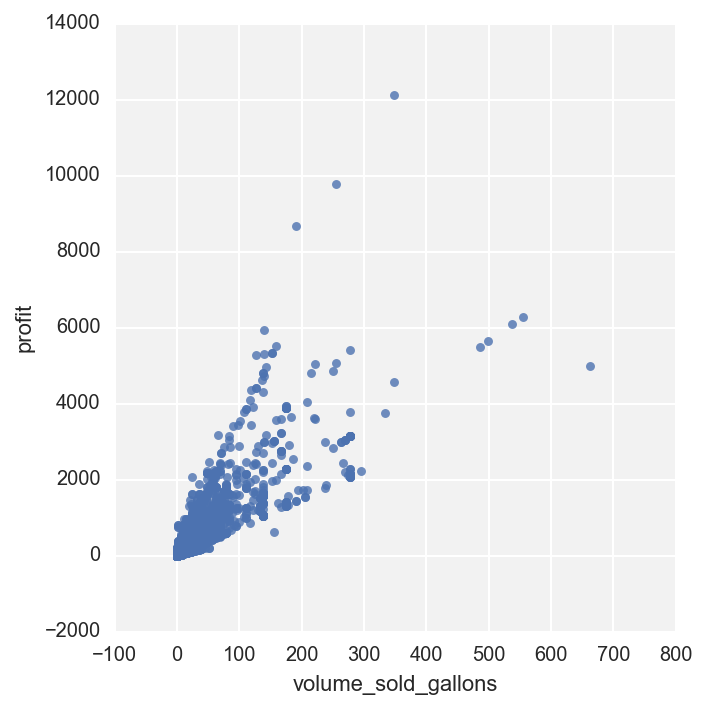

In [78]:
sns.set_style("darkgrid", {"axes.facecolor": ".95"})

sns.lmplot("volume_sold_gallons", "profit", data=sales_2015_12_months, fit_reg=False)

plt.show()

In [79]:
sales_2015_12_months[['volume_sold_gallons', 'profit']].corr()

,volume_sold_gallons,profit
volume_sold_gallons,1.000000,0.850507
profit,0.850507,1.000000


### 5.6 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [80]:
sales_2015_12_months.columns

Index([u'date', u'store_number', u'city', u'zip_code', u'county',
       u'category_name', u'vendor_number', u'item_number', u'item_description',
       u'bottle_volume_ml', u'state_bottle_cost', u'state_bottle_retail',
       u'bottles_sold', u'sale_dollars', u'volume_sold_gallons', u'month',
       u'year', u'profit', u'profit_gal_2'],
      dtype='object')

In [81]:
sales_2015_12_months.category_name

0                           APRICOT BRANDIES
4                             VODKA 80 PROOF
5                          AMERICAN DRY GINS
6                    AMERICAN GRAPE BRANDIES
7                          CANADIAN WHISKIES
9                          CINNAMON SCHNAPPS
10            SINGLE BARREL BOURBON WHISKIES
11                        AMERICAN COCKTAILS
12                         CANADIAN WHISKIES
15                          APRICOT BRANDIES
17                            VODKA FLAVORED
18               DISTILLED SPIRITS SPECIALTY
19                         CANADIAN WHISKIES
20                            VODKA FLAVORED
21                         CANADIAN WHISKIES
22                          BLENDED WHISKIES
23                                   TEQUILA
25                        TENNESSEE WHISKIES
26                         CANADIAN WHISKIES
27                          BLENDED WHISKIES
28                            VODKA 80 PROOF
29                           WHISKEY LIQUEUR
30        

In [82]:
def alcohol_category_maker(x):
    x = x.lower()
    if 'brandies' in x:
        return 'brandy'
    
    elif 'vokda' in x:
        return 'vodka'
    
    elif 'whiskies' in x:
        return 'whisky'
    
    elif 'schnapps' in x:
        return 'schnapps'
    
    elif 'tequila' in x:
        return 'tequila'
    
    elif 'cocktail' in x:
        return 'mixed_drink'
    
    elif 'rum' in x:
        return 'rum'
    
    elif 'cordials' in x:
        return 'cordials'
    else:
        return 'other'
    
sales_2015_12_months['alcohol_category'] = sales_2015_12_months.category_name.map(alcohol_category_maker)

/Users/VanessaG/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [83]:
sales_2015_12_months[['item_description', 'category_name', 'alcohol_category']].head

<bound method DataFrame.head of                              item_description  \
0                   Mr. Boston Apricot Brandy   
4                          Five O'clock Vodka   
5                           New Amsterdam Gin   
6                               Korbel Brandy   
7                        Canadian Club Whisky   
9                          Dekuyper Hot Damn!   
10           Knob Creek Single Barrel Reserve   
11              Chi-Chi's Margarita W/tequila   
12                       Windsor Canadian Pet   
15                  Mr. Boston Apricot Brandy   
17                              Uv Cake Vodka   
18                            Juarez Gold Dss   
19               Lord Calvert Canadian Whisky   
20                       44 North Huckleberry   
21                      Black Velvet Traveler   
22                Seagrams 7 Crown Bl Whiskey   
23      Jose Cuervo Especial Reposado Tequila   
25              Jack Daniels Old #7 Black Lbl   
26           Crown Royal Canadian Whi

### 5.7 Do relationships exist between the broader liquor type and profit?

In [84]:
alcohol_cat_profit = sales_2015_12_months.groupby(['alcohol_category'])['profit'].sum().reset_index()
alcohol_cat_profit.sort_values('profit', ascending=False).head(10)

,alcohol_category,profit
3,other,3303267.96
7,whisky,2622013.39
4,rum,1155231.98
6,tequila,484912.28
0,brandy,341049.53
5,schnapps,310613.93
1,cordials,304077.81
2,mixed_drink,145463.11


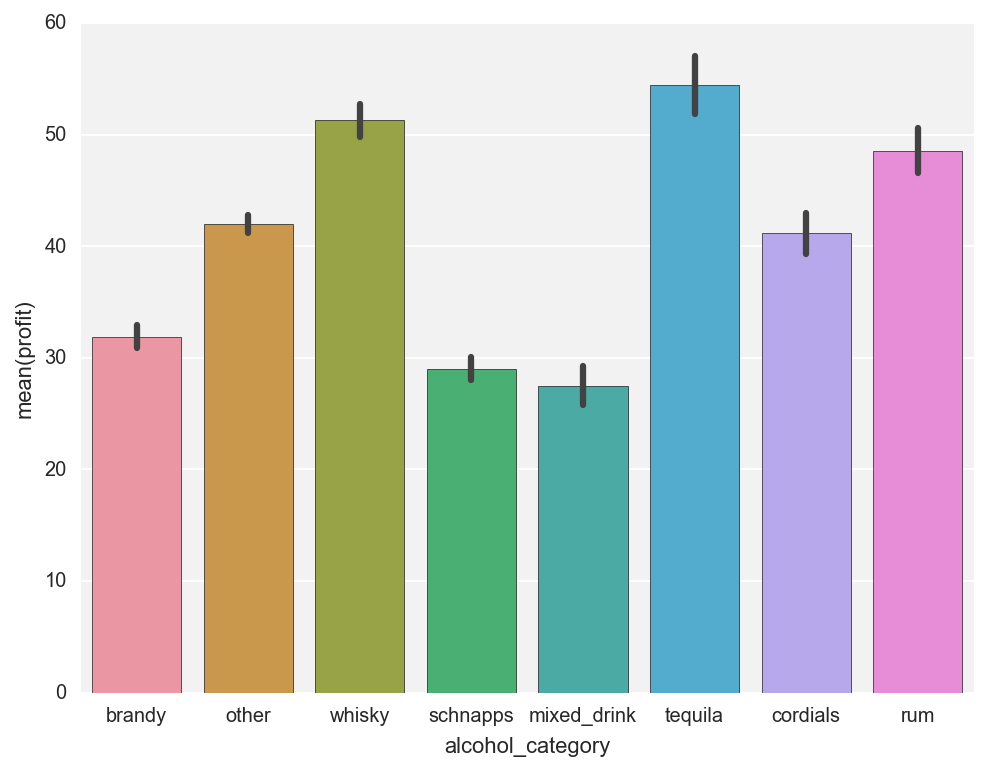

In [85]:
fig = plt.figure(figsize=(8,6))
sns.barplot(x=sales_2015_12_months.alcohol_category ,y=sales_2015_12_months.profit)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 5.8 Are there any noticeable relationships between liquor brand and sales? Profit?

### 5.9 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 6. Market research for new store locations (Scenario 2)

A liquor store owner in Iowa is looking to open a store in a new location and has hired you to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [123]:
def alcohol_category_maker(x):
    x = x.lower()
    if 'brandies' in x:
        return 'brandy'
    
    elif 'vokda' in x:
        return 'vodka'
    
    elif 'whiskies' in x:
        return 'whisky'
    
    elif 'schnapps' in x:
        return 'schnapps'
    
    elif 'tequila' in x:
        return 'tequila'
    
    elif 'cocktail' in x:
        return 'mixed_drink'
    
    elif 'rum' in x:
        return 'rum'
    
    elif 'cordials' in x:
        return 'cordials'
    else:
        return 'other'
    
iowa['alcohol_category'] = iowa.category_name.map(alcohol_category_maker)

In [124]:
iowa.loc[:,'profit'] = (iowa.loc[:,'state_bottle_retail'] - iowa.loc[:,'state_bottle_cost']) * \
                                        iowa.loc[:,'bottles_sold']

In [125]:
q1_2015 = iowa[(iowa['date'] > '2015/01/01') & (iowa['date'] < '2015/04/01')]
q1_2016 = iowa[(iowa['date'] > '2016/01/01') & (iowa['date'] < '2016/04/01')]

In [154]:
q1_2015_areas = q1_2015.groupby(['store_number', 'county', 'city', 'zip_code','alcohol_category'])['profit'].sum().reset_index()
q1_2016_areas = q1_2016.groupby(['store_number','county', 'city', 'zip_code', 'alcohol_category'])['profit'].sum().reset_index()

In [156]:
q1_growth = pd.merge(q1_2015_areas, q1_2016_areas, how='inner', on='store_number',suffixes=('_q1_15','_q1_16'))

In [180]:
q1_growth.head(3)

,store_number,county_q1_15,city_q1_15,zip_code_q1_15,alcohol_category_q1_15,profit_q1_15,county_q1_16,city_q1_16,zip_code_q1_16,alcohol_category_q1_16,profit_q1_16,change
0,2106,Black Hawk,CEDAR FALLS,50613,brandy,241.92,Black Hawk,CEDAR FALLS,50613,brandy,156.72,-85.20
1,2106,Black Hawk,CEDAR FALLS,50613,brandy,241.92,Black Hawk,CEDAR FALLS,50613,cordials,482.16,240.24
2,2106,Black Hawk,CEDAR FALLS,50613,brandy,241.92,Black Hawk,CEDAR FALLS,50613,mixed_drink,52.32,-189.60


In [161]:
q1_growth['change'] = q1_growth['profit_q1_16'] - q1_growth['profit_q1_15']

In [184]:
county = q1_growth.groupby(['county_q1_15' ]).sum().reset_index()

In [185]:
county[['county_q1_15', 'profit_q1_15', 'profit_q1_16', 'change' ]].sort_values(by='change', ascending = False).head(10)

,county_q1_15,profit_q1_15,profit_q1_16,change
51,Johnson,686482.66,860503.08,174020.42
77,Pottawattamie,532967.05,609206.60,76239.55
55,Lee,185186.47,243068.17,57881.70
23,Crawford,44515.81,95841.61,51325.80
96,Woodbury,569338.12,605878.80,36540.68
32,Fayette,39924.18,68115.17,28190.99
15,Cedar,17855.92,45467.87,27611.95
83,Sioux,63559.88,88619.60,25059.72
24,Dallas,221934.03,243825.90,21891.87
30,Dubuque,436545.12,455538.00,18992.88


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [173]:
county['growth'] = (county['change']/county['profit_q1_15'])*100

### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

In [174]:
county.sort_values(by='growth', ascending = False).head(10)

,county_q1_15,store_number,profit_q1_15,profit_q1_16,change,growth
15,Cedar,778521,17855.92,45467.87,27611.95,154.637510
23,Crawford,608694,44515.81,95841.61,51325.80,115.297913
11,Butler,591306,6706.81,13389.59,6682.78,99.641707
53,Keokuk,347718,4325.84,7746.16,3420.32,79.067187
32,Fayette,986776,39924.18,68115.17,28190.99,70.611319
12,Calhoun,403320,7267.72,12342.65,5074.93,69.828364
0,Adair,613278,14221.16,22036.14,7814.98,54.953182
46,Ida,386860,14735.85,22686.18,7950.33,53.952300
3,Appanoose,595924,31309.61,48094.21,16784.60,53.608461
97,Worth,298225,12379.00,18996.36,6617.36,53.456337


### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [191]:
#ran out of time here and also I'm not certain what I did above actually makes sense.....

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Time-related effects

---

You could imagine that liquor sales might be affected by a variety of effects related to time. Do people buy more beer in the summer? Do liquor sales skyrocket in december? Do people buy less liquor on Tuesdays?

You have the date of sales in your dataset, which you can use to pull out time components.

1. Come up with 3 different hypotheses about how liquor sales may vary with time-related variables. 
2. Create a visualization exploring each hypothesis.
3. Write brief concluding remarks on what you observed.


<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Appropriate spending

---

The owner you worked with before realized that opening new stores cost money, something he had completely overlooked earlier. He brings you back in to help him figure out how much he should be willing to spend on opening his store.

### 8.1 Calculate costs and time to recoup.

The owner has decided he will buy 20,000 gallons of the liquor type you recommended (randomly sampled across the different brands/subtypes). He will also be opening his store in the area you recommended.

The cost of buying the property for his store will be $150,000.

1. How much should he expect to spend on the 20,000 gallons of liquor alone?
2. Based on the amount he's spent on the liquor and property, and on the profit per time period he is expected to have, how long will it take him to recoup the costs?

<img src="http://imgur.com/gGrau8s.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">


### 8.2 Calculate maximum loan interest rate.

The owner unfortunately has to take out a loan to to pay for the entirety of the property and liquor. 

**Conditions of the loan**:

Every quarter, (except for Q1 when he takes out the loan), the interest rate is applied to the remaining balance on the loan and added to his debt. 

If, for example, he made no payments whatsoever, not only would the amount of debt he owed keep increasing by quarter but the debt incurred from interest would keep increasing as well. (Since his debt keeps growing, the interest rate is applied each month to the bigger balance, incurring more debt each time.)

**Determining maximum acceptable interest:**

Given this, _the owner wants to be 99% confident that he will be able to pay off his loans._ If the interest rate is too high he will have to eventually declare bankruptcy.

Based on his expected profits per quarter (assume the expected profit stays the same for all future quarters), what is the maximum interest rate he should accept on the loan to be 99% confident he will be able to pay it off?